# Salary Prediction using simple Linear Regression

In [78]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# 1.Collecting Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/ML Projects/Salary Prediction/Salary_dataset.csv'

In [ ]:
df = pd.read_csv(file_path)

# 2.Exploratory Data Analysis

In [ ]:
df.head()

,Sl.no,YearsExperience,Salary
0,0,1.2,39344
1,1,1.4,46206
2,2,1.6,37732
3,3,2.1,43526
4,4,2.3,39892


In [ ]:
df.tail()

,Sl.no,YearsExperience,Salary
25,25,9.1,105583
26,26,9.6,116970
27,27,9.7,112636
28,28,10.4,122392
29,29,10.6,121873


In [ ]:
df.shape

(30, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sl.no            30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 848.0 bytes


In [ ]:
df.describe()

,Sl.no,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [ ]:
df.isnull()

,Sl.no,YearsExperience,Salary
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [ ]:
df.isnull().sum()

Sl.no              0
YearsExperience    0
Salary             0
dtype: int64

In [ ]:
df.count()

Sl.no              30
YearsExperience    30
Salary             30
dtype: int64

In [ ]:
df.min()

Sl.no                  0.0
YearsExperience        1.2
Salary             37732.0
dtype: float64

In [ ]:
df.max()

Sl.no                  29.0
YearsExperience        10.6
Salary             122392.0
dtype: float64

In [ ]:
df.mean()

Sl.no                 14.500000
YearsExperience        5.413333
Salary             76004.000000
dtype: float64

In [ ]:
df.median()

Sl.no                 14.5
YearsExperience        4.8
Salary             65238.0
dtype: float64

In [ ]:
df.mode()

,Sl.no,YearsExperience,Salary
0,0,3.3,37732
1,1,4.1,39344
2,2,NaN,39892
3,3,NaN,43526
4,4,NaN,46206
5,5,NaN,54446
6,6,NaN,55795
7,7,NaN,56643
8,8,NaN,56958
9,9,NaN,57082


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sl.no            30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 848.0 bytes


## Outliers

#  1 Boxplot

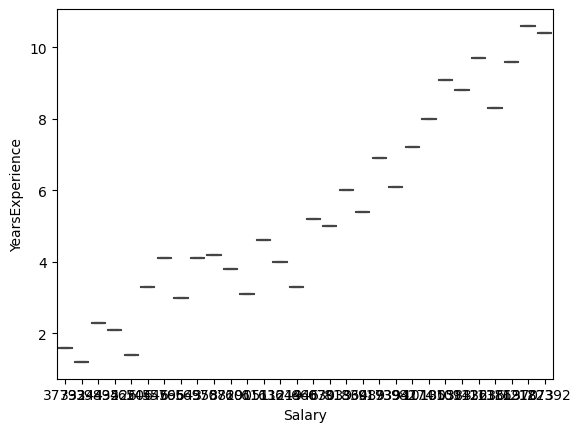

In [ ]:
sns.boxplot(x='Salary',y='YearsExperience',data=df)
plt.show()

# 3. Data Visualization

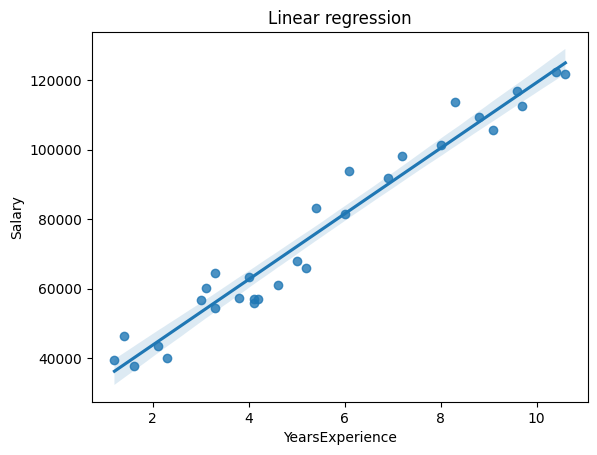

In [ ]:
plt.title("Linear regression")
sns.regplot(df, x="YearsExperience", y="Salary")
plt.show()

<Axes: title={'center': 'histogramm of distribution.'}, xlabel='Salary', ylabel='Count'>

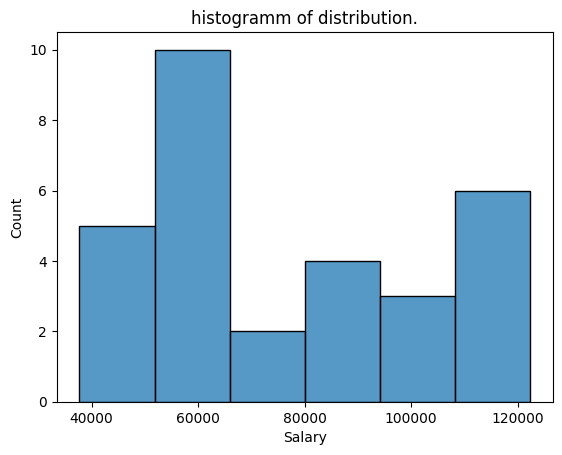

In [ ]:
plt.title("histogramm of distribution.")
sns.histplot(df, x="Salary")

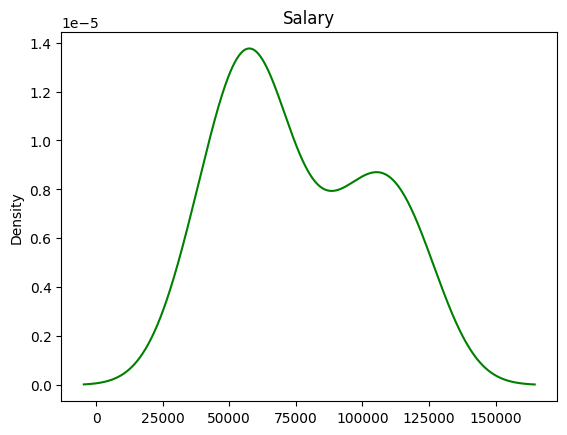

In [ ]:
df.Salary.plot.density(color='green')
plt.title('Salary')
plt.show()

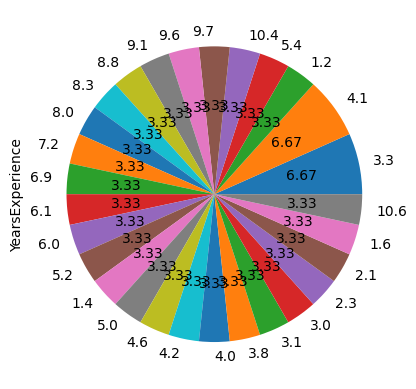

In [ ]:
df['YearsExperience'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

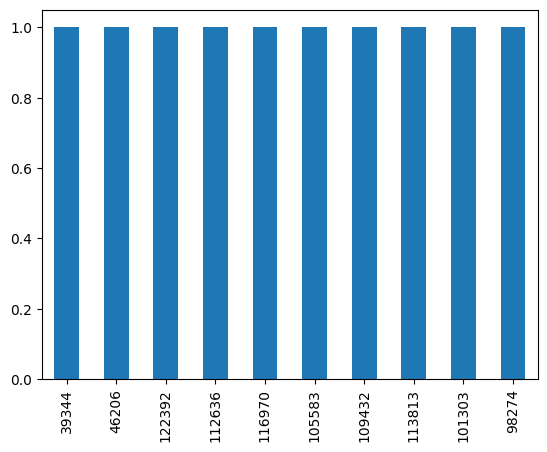

In [ ]:
df['Salary'].value_counts().head(10).plot.bar()
plt.show()

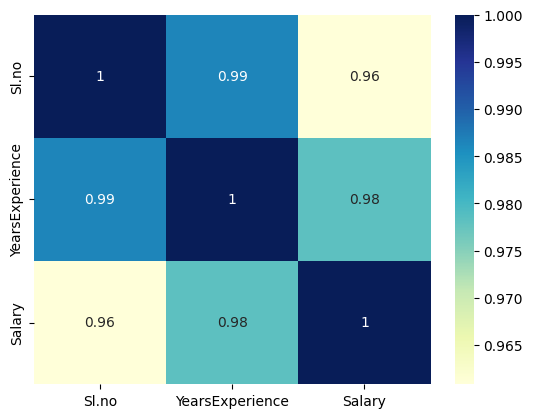

In [54]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sl.no            30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 848.0 bytes


# 4. Machine Learning model selection

# # Performing Simple Linear Regression

 In our case Y = c + m * YearsExperience

### Generic Steps In model building using statsmodels
We first assign the feature variable, YearsExperience, In this case, to the variable X and_ the response variable,Salary, to the variable y.

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

In [ ]:
X = df['YearsExperience']
y = df['Salary']

#### Train - Test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
# Lets take a look at train set

In [ ]:
X_train.head()

17     5.4
22     8.0
11     4.1
4      2.3
29    10.6
Name: YearsExperience, dtype: float64

In [ ]:
y_train.head()

17     83089
22    101303
11     55795
4      39892
29    121873
Name: Salary, dtype: int64

###  Building a Linear model

In [ ]:
import statsmodels.formula.api as sm

In [ ]:
import statsmodels.api as sm


##### By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [ ]:
# adding a constant to intercept
X_train_sm = sm.add_constant(X_train)

In [ ]:
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train,X_train_sm).fit()

In [ ]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const              24230.767402
YearsExperience     9731.203838
dtype: float64

In [ ]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     352.9
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           9.91e-14
Time:                        13:14:57   Log-Likelihood:                -211.80
No. Observations:                  21   AIC:                             427.6
Df Residuals:                      19   BIC:                             429.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.423e+04   2921.388     

## Looking at some key statistics from the summary

The values we are concerned with are -
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

1. The coefficient for TV is 97311.2038, with a very High p value
The coefficient is statistically significant.

2. R - squared is 0.949
   Meaning that 94.9% of the variance in Salary is explained by YearsofExperience
   This is a Good R-squared value.

###3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Salary = 24230.767402 +  9731.2038 \times YearsofExperience $

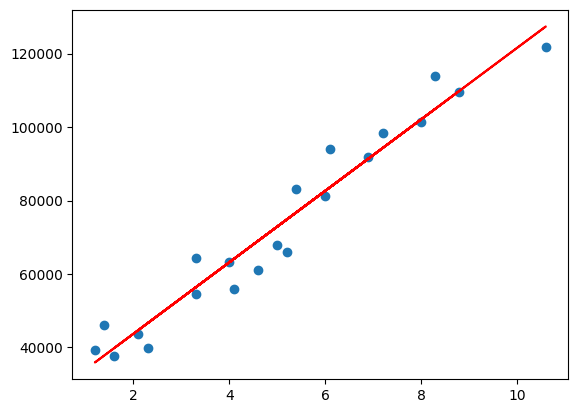

In [64]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 24230.7+9731.2*X_train, 'r')
plt.show()

## Step 4 : Residual Analysis

To validate assumptions of the model, and hence the reliability for inference

### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [61]:
# Residuals = Actual - Predicted

In [65]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

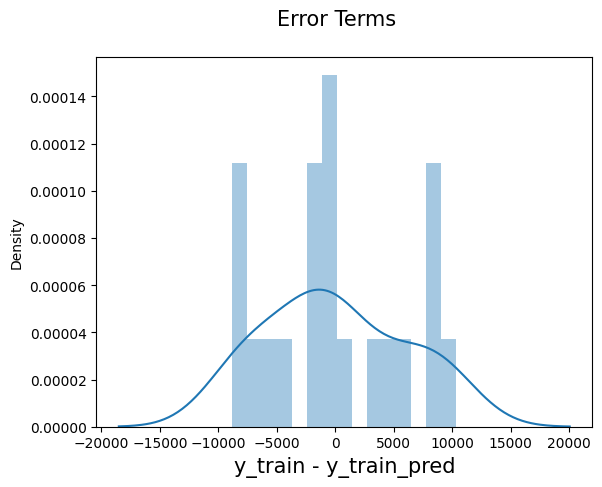

In [66]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

## Looking for patterns in the residuals

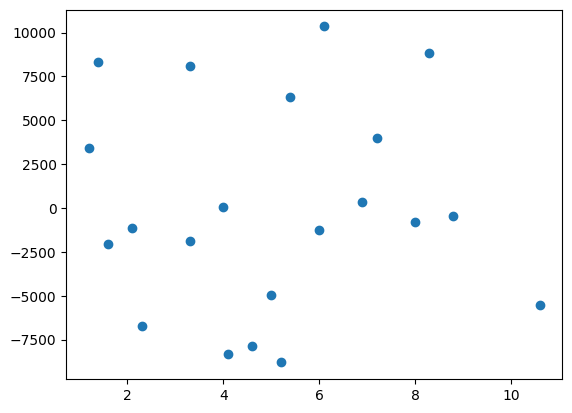

In [67]:
plt.scatter(X_train,res)
plt.show()

## Step 5: Predictions on the Test Set
Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the X_test data like you did for X_train and then you can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line

In [68]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [69]:
y_pred.head()

9      61209.341988
26    117650.324249
28    125435.287320
13     65101.823523
5      53424.378917
dtype: float64

In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Looking at the RMSE

In [71]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

5505.479002176151

Checking the R-squared on the test set

In [72]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9627668685473266

Visualizing the fit on the test set

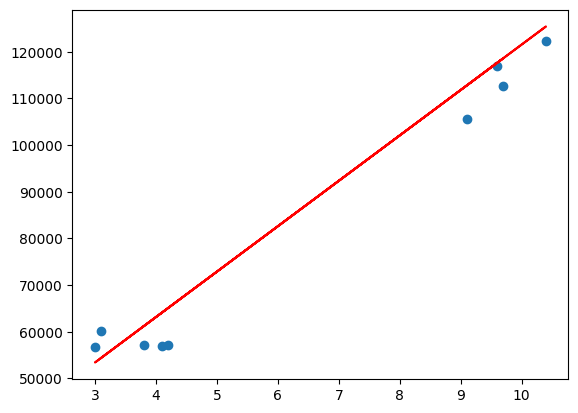

In [73]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 24230.7+9731.2* X_test, 'r')
plt.show()

### Linear Regression using `linear_model` in `sklearn`

Apart from `statsmodels`, there is another package namely `sklearn` that can be used to perform linear regression. We will use the `linear_model` library from `sklearn` to build the model. Since, we hae already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.

In [75]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [76]:
X_train_lm.shape

(21,)

In [80]:
X_train_lm =np.array( X_train_lm).reshape(-1,1)
X_test_lm =np.array( X_test_lm).reshape(-1,1)

In [81]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(21, 1)
(21,)
(9, 1)
(9,)


In [82]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [83]:
print(lm.intercept_)
print(lm.coef_)

24230.767402330363
[9731.20383825]


The equationwe get is the same as what we got before!

$ Sales = 6.948 + 0.054* TV $